# Load Data

In [2]:
file = open('Royal_data.txt','r')
royal_data = file.readlines()
file.close()

In [5]:
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


In [4]:
for i in range(0, len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n','')

# Remove stop words and tokenize

In [7]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []

for sent in royal_data:
    temp=[]
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)    
    

In [8]:
print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


# Creating Bigrams

In [9]:
bigrams = []

for words_list in filtered_data:

    for i in range(len(words_list)-1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])

print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


# Vocabulary

In [17]:
#we need only unique values
all_words = []

for sent in filtered_data:
    all_words.extend(sent)

all_words = list(set(all_words))
all_words.sort()

In [18]:
print(all_words)

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']


# One-hot encoding

In [19]:
word_dict = {}
cnt = 0

for word in all_words:
    word_dict[word] = cnt
    cnt += 1

print(word_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [22]:
import numpy as np

one_hot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    one_hot_data[i][i]=1

print(one_hot_data)

one_hot_dict = {}

for i in range(len(all_words)):
    one_hot_dict[all_words[i]] = one_hot_data[i]


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [24]:
for word in one_hot_dict:
    print(word,":",one_hot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [27]:
#creating dataset

X = []
Y = []

for bi in bigrams:
    X.append(one_hot_dict[bi[0]])
    Y.append(one_hot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

# Model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()

vocab_size = len(one_hot_data[0])
embed_size = 2

model.add(Input(shape = (vocab_size,)))
model.add(Dense(embed_size, activation = 'linear'))
model.add(Dense(vocab_size, activation = 'softmax'))


model.compile(loss='categorical_crossentropy', optimizer = 'adam')


In [29]:
model.fit(X, Y, epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.4926 
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4850
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4896
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4861
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 2.4806
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4860
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4835
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.4832
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.4822
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4811
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4747
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.4763
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.4759
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.4778
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.4762
Epo

In [31]:
weights = model.get_weights()[0] 

word_embeddings = {}

for word in all_words:
    word_embeddings[word] = weights[word_dict[word]]

for word in all_words:
    print(word, " : ", word_embeddings[word])

beautiful  :  [ 1.3297677 -0.4558053]
boy  :  [-1.5619965  0.5409594]
daughter  :  [1.217499   0.30247164]
future  :  [0.3519199  0.77620405]
king  :  [-1.6160045  0.9150553]
man  :  [0.62781245 0.44653648]
prince  :  [0.10512525 0.00132205]
princess  :  [-0.6422184 -1.1945494]
queen  :  [ 9.6042329e-01 -1.6578674e-04]
son  :  [-0.2268231  1.1530666]
strong  :  [-0.96942604  0.7637336 ]
woman  :  [-0.74120384 -0.7245727 ]


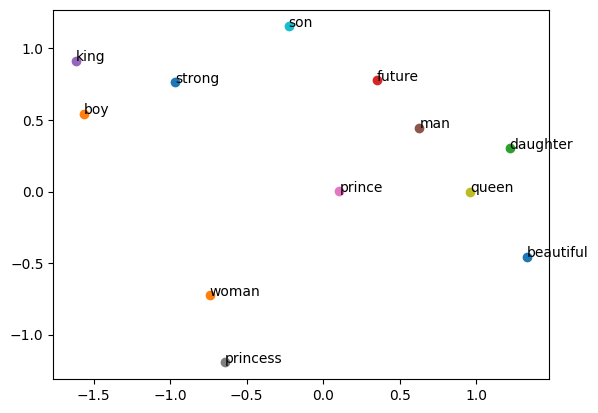

In [32]:
import matplotlib.pyplot as plt

for word in all_words:
    coordinates = word_embeddings[word]
    plt.scatter(coordinates[0], coordinates[1])
    plt.annotate(word,(coordinates[0], coordinates[1]))

plt.show()